# 数据绘图要点1-注重数据排序
默认情况下，大多数数据可视化工具将使用字母顺序或使用输入表中的出现顺序对分类变量组进行排序。当显示多个实体项的值时，对它们进行排序会使得图表更具洞察力。

## 实例

### 无序棒棒糖图

让我们从一个无序棒棒糖图开始，下面代码展示了一些国家出口的某一重要物品的数量。这里每一行代表一个国家，X 轴显示2017 年销售的重要物品数量。默认情况下，国家按字母顺序排列。

In [7]:
# Libraries
library(tidyverse)
library(hrbrthemes)
library(kableExtra)
options(knitr.table.format = "html")

# 从github加载数据
data <- read.table("https://raw.githubusercontent.com/holtzy/data_to_viz/master/Example_dataset/7_OneCatOneNum.csv", header=TRUE, sep=",")
# 展示数据
head(data,10)
# 长度
nrow(data)

,Country,Value
,<fct>,<int>
1,United States,12394
2,Russia,6148
3,Germany (FRG),1653
4,France,2162
5,United Kingdom,1214
6,China,1131
7,Soviet Union,NA
8,Netherlands,1167
9,Italy,660


[1] 51

In [8]:
# 清除空值数据
data <- filter(data,!is.na(Value))
nrow(data)

[1] 38

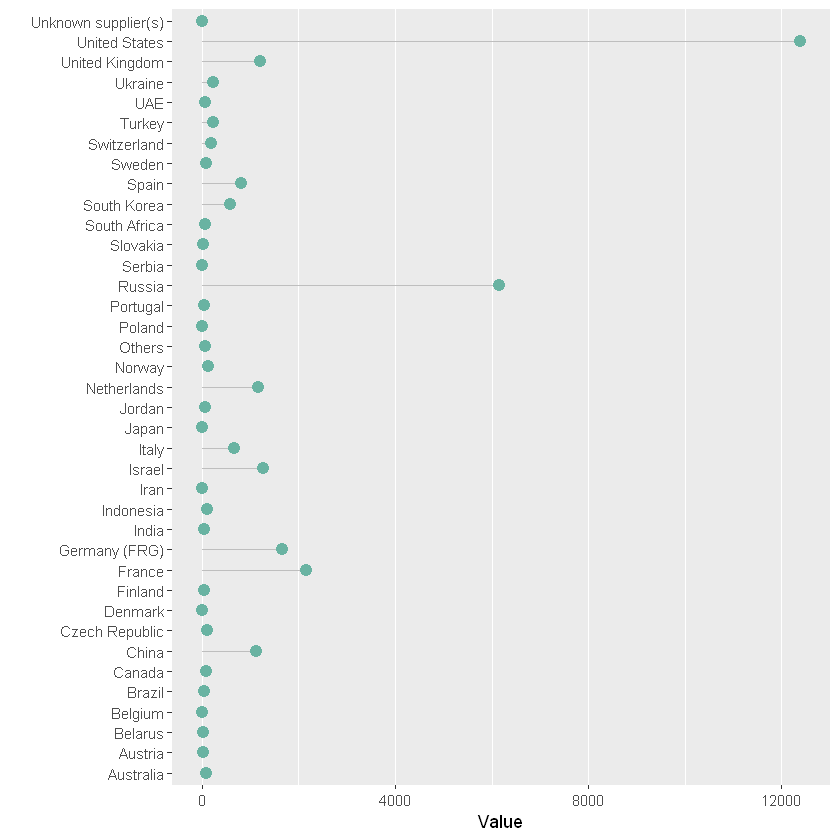

In [9]:
# 绘图
ggplot(data,aes(x=Country, y=Value) ) +
# 定义数据轴
geom_segment( aes(x=Country ,xend=Country, y=0, yend=Value), color="grey") +
# 绘制点
geom_point(size=3, color="#69b3a2") +
# x,y轴调换
coord_flip() +
# 设置主题
theme(
    # 将内部线条设置为空
    panel.grid.minor.y = element_blank(),
    panel.grid.major.y = element_blank(),
    legend.position="none"
) +
# 原来x轴也就是现在图像中y轴的轴标题设置为空
xlab("")

很明显，美国和俄罗斯出售物品数量比其他国家多得多。然而，很难看出任何其他国家之间的差异，读者必须从一个国家到另一个国家进行比较。这是很多工作，肯定会放弃对您的图形的关注。

### 有序棒棒糖图
相反，让我们制作完全相同的图表，但使用它们的值重新排序每个组。


In [10]:
# Libraries
library(tidyverse)
library(hrbrthemes)
library(kableExtra)
options(knitr.table.format = "html")

# 从github加载数据
data <- read.table("https://raw.githubusercontent.com/holtzy/data_to_viz/master/Example_dataset/7_OneCatOneNum.csv", header=TRUE, sep=",")
# 清除空值数据
data <- filter(data,!is.na(Value))
nrow(data)
head(data)

[1] 38

,Country,Value
,<fct>,<int>
1,United States,12394
2,Russia,6148
3,Germany (FRG),1653
4,France,2162
5,United Kingdom,1214
6,China,1131


In [11]:
# 排列数据
data<- arrange(data,Value)
# 将Contry转换为factor项，来表示分类数据
data<- mutate(data,Country=factor(Country, Country)) 

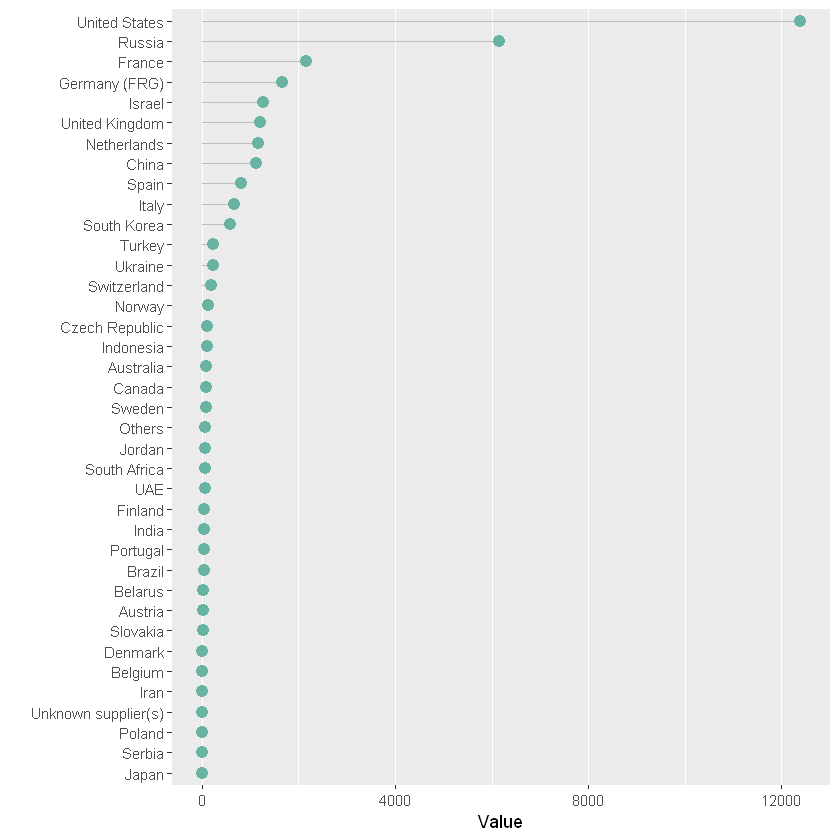

In [12]:
# 绘图
ggplot(data,aes(x=Country, y=Value) ) +
# 定义数据轴
geom_segment( aes(x=Country ,xend=Country, y=0, yend=Value), color="grey") +
# 绘制点
geom_point(size=3, color="#69b3a2") +
# x,y轴调换
coord_flip() +
# 设置主题
theme(
    # 将内部线条设置为空
    panel.grid.minor.y = element_blank(),
    panel.grid.major.y = element_blank(),
    legend.position="none"
) +
# 原来x轴也就是现在图像中y轴的轴标题设置为空
xlab("")

这个数字现在更具洞察力，法国是第三大出口国，其次是德国、以色列和英国。当然，请注意，将每个国家的人口归一化该图形以获得更多可比数据是有意义的。重新排序数据是构建图表时应始终考虑的简单步骤。当然，有时组的顺序必须由它们的特征而不是它们的值来设置，例如一年中的几个月，这是值得考虑。

## 参考
+ [WHY YOU SHOULD ORDER YOUR DATA](https://www.data-to-viz.com/caveat/order_data.html)
+ [如何理解R中因子(factor)的概念](https://www.zhihu.com/question/48472404)